# Calculating the Global Minimum Variance Portfolio Weights Based on Given Stocks/Mutual Funds 

SOURCE: Code used from Investment Management with Python and Machine Learning - EDHEC Business School - Coursera Course (edhec_risk_kit).

This code plots the global minimum variance portfolio on the efficient frontier. The global minimum variance portfolio does not depend on expected returns. Based on the portfolio weights, the code will determine the amount of money to invest in each stock/mutual fund given a total amount of money to invest.


In [1]:
pip install pandas-datareader

     |████████████████████████████████| 107 kB 3.5 MB/s eta 0:00:01
     |████████████████████████████████| 5.5 MB 10.8 MB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pandas_datareader as web
import edhec_risk_kit as erk

In [3]:
#Enter stock tickers in tickers list. Example taken from Fastest Growing Stocks from June 2020 (Investopedia)
#Change start and end dates to desired date range.

tickers = ["ABC", "MGM", "ALGN", "DXCM", "NVDA", "AMD"]
multiple_stocks = web.get_data_yahoo(tickers,
start = "2012-01-01",
end = "2020-06-23")
multiple_stocks_monthly_returns = multiple_stocks['Adj Close'].resample('M').ffill().pct_change()


In [4]:
%load_ext autoreload
%autoreload 2
%matplotlib inline


ind = multiple_stocks['Adj Close'].resample('M').ffill().pct_change()
er = erk.annualize_rets(ind, 12)
cov = ind.cov()
riskfree_rate = .1

In [5]:
#show monthly returns based on tickers inputted
ind.tail()

Symbols,ABC,ALGN,AMD,DXCM,MGM,NVDA
Date,,,,,,
2020-02-29,-0.010152,-0.150720,-0.032340,0.146417,-0.209272,0.142966
2020-03-31,0.049573,-0.203343,0.000000,-0.024384,-0.515983,-0.023957
2020-04-30,0.013107,0.235125,0.151935,0.244847,0.426271,0.108801
2020-05-31,0.068692,0.143216,0.026914,0.128610,0.020796,0.214657
2020-06-30,0.064611,0.088714,0.003532,0.075573,0.074641,0.065215


In [5]:
#show covariance matrix based on tickers provided
ind.cov()

Symbols,ABC,ALGN,AMD,DXCM,MGM,NVDA
Symbols,,,,,,
ABC,0.003938,0.000549,0.002080,0.001845,0.000818,0.001402
ALGN,0.000549,0.012994,0.007916,0.001972,0.004925,0.004960
AMD,0.002080,0.007916,0.026004,0.004649,0.005303,0.007260
DXCM,0.001845,0.001972,0.004649,0.018634,0.003134,0.001173
MGM,0.000818,0.004925,0.005303,0.003134,0.011300,0.003756
NVDA,0.001402,0.004960,0.007260,0.001173,0.003756,0.011500


In [6]:
#Show annualized returns by stock
er.sort_values(ascending=False)

Symbols
DXCM    0.529753
NVDA    0.478845
ALGN    0.330816
AMD     0.278027
ABC     0.137299
MGM     0.048560
dtype: float64

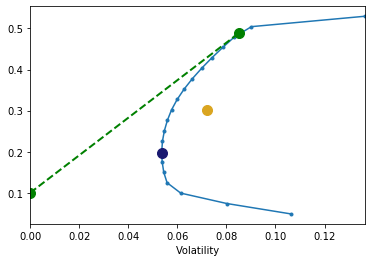

In [7]:
#plot on efficient frontier, the max sharpe ratio, the naive diversification portfolio (yellow)
#and the global minimum variance portfolio (blue)

erk.plot_ef(20, er, cov, show_cml=True, riskfree_rate=0.1, show_ew=True, show_gmv=True)

In [8]:
# get portfolio return, portfolio volatlity - Max Sharpe Ratio
w_msr = erk.msr(riskfree_rate, er, cov)
r_msr = erk.portfolio_return(w_msr, er)
vol_msr = erk.portfolio_vol(w_msr, cov)
r_msr, vol_msr


(0.4892913006090158, 0.08522151777869484)

In [9]:
# get portfolio return, portfolio volatlity - Global Minimum Variance
w_gmv = erk.gmv(cov)
r_gmv = erk.portfolio_return(w_gmv, er)
vol_gmv = erk.portfolio_vol(w_gmv, cov)
r_gmv, vol_gmv

(0.19716463708936433, 0.053622755965467665)

In [10]:
np.around(w_msr, decimals=4, out=None)

array([0.    , 0.0633, 0.    , 0.3891, 0.    , 0.5476])

In [11]:
#Enter amount of money you want to invest. Returns money to invest in for each stock ticker in portfolio. For Max Sharpe Portfolio
money_to_invest = 2500
invest_in = list(ind.columns)
portfolio_allocation = np.around(w_msr, decimals=4, out=None) * money_to_invest
dollars = portfolio_allocation.tolist()
invest_in_this = zip(invest_in, dollars)
invest_in_this_set = set(invest_in_this)
invest_in_this_set


{('ABC', 0.0),
 ('ALGN', 158.25),
 ('AMD', 0.0),
 ('DXCM', 972.75),
 ('MGM', 0.0),
 ('NVDA', 1369.0)}

In [15]:
#Weights for global minimum variance portfolio (numpy array)
w_gmv

array([6.35892216e-01, 1.10481666e-01, 1.69399813e-15, 5.46873512e-02,
       1.18347572e-01, 8.05911947e-02])

In [16]:
np.around(w_gmv, decimals=4, out=None)

array([0.6359, 0.1105, 0.    , 0.0547, 0.1183, 0.0806])

In [17]:
#Enter amount of money you want to invest. Returns money to invest in for each stock ticker in portfolio. For Global Minimum Variance Portfolio
money_to_invest = 2500
invest_in = list(ind.columns)
portfolio_allocation = np.around(w_gmv, decimals=4, out=None) * money_to_invest
dollars = portfolio_allocation.tolist()
invest_in_this = zip(invest_in, dollars)
invest_in_this_set = set(invest_in_this)
invest_in_this_set

{('ABC', 1589.75),
 ('ALGN', 276.25),
 ('AMD', 0.0),
 ('DXCM', 136.75),
 ('MGM', 295.75),
 ('NVDA', 201.5)}